# Algorithm visualization

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.datasets import make_gaussian_quantiles
from palettable.colorbrewer.sequential import Greys_3 as MainColorMap
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

In [3]:
samples = np.array([[1,2], [2,3], [2,2], [3,6]])

In [4]:
params = {
   'axes.labelsize': 8,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5]
   }
plt.rcParams.update(params)

In [5]:
cm = MainColorMap.get_mpl_colormap()

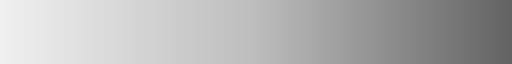

In [6]:
MainColorMap.get_mpl_colormap()

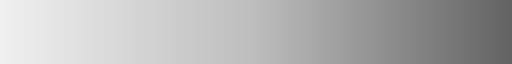

In [7]:
cm

In [8]:
cm(10)

(0.9254901960784314, 0.9254901960784314, 0.9254901960784314, 1.0)

In [9]:
MainColorMap.mpl_colors

[(0.9411764705882353, 0.9411764705882353, 0.9411764705882353),
 (0.7411764705882353, 0.7411764705882353, 0.7411764705882353),
 (0.38823529411764707, 0.38823529411764707, 0.38823529411764707)]

In [10]:
MainColorMap.mpl_colors

[(0.9411764705882353, 0.9411764705882353, 0.9411764705882353),
 (0.7411764705882353, 0.7411764705882353, 0.7411764705882353),
 (0.38823529411764707, 0.38823529411764707, 0.38823529411764707)]

In [11]:
# first_three_colors = [MainColorMap.mpl_colors[0], MainColorMap.mpl_colors[2], MainColorMap.mpl_colors[4]]

In [11]:
from itertools import cycle
def colormap_iterator():
    return cycle(MainColorMap.mpl_colors)

In [12]:
rules = {
    'Rule 1 Tree': ((20, 155), 20, 25),
    'Rule 2 Tree': ((45, 185), 15, 20),
    'Rule 3 Tree': ((70, 140), 20, 70),
}

In [13]:
hatches = [
  '//',
    '\\\\',
    '//\\\\'
]


In [14]:
def basic_style(ax):
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#     ax.grid(linestyle = '--', linewidth=0.5,  clip_on=False, alpha=0.3)
#     ax.grid(which='minor', linestyle=':', alpha=0.2)


In [15]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(1)

centroids = np.array([
[20, 150],
    [60, 160],
    [50, 200]
])
clf.fit(centroids, [1,2,3])

KNeighborsClassifier(n_neighbors=1)

In [16]:
from mlxtend.plotting import plot_decision_regions


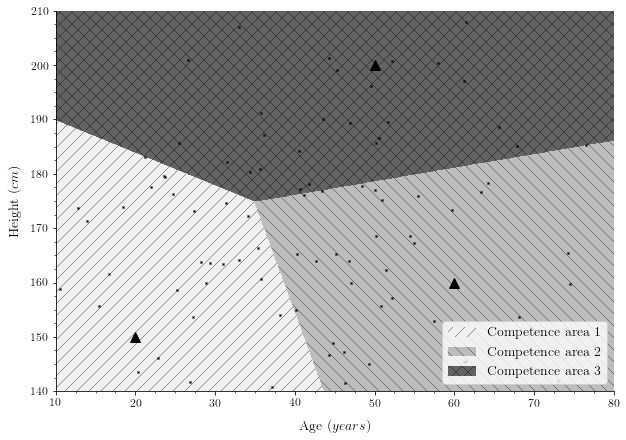

In [17]:
params = {
   'axes.labelsize': 14,
   'legend.fontsize': 14,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   }
mpl.rcParams.update(params)

cm = colormap_iterator()

plt.rc('font', family='serif')
plt.rc('text', usetex=True)
mpl.rcParams['hatch.linewidth'] = 0.3
# mpl.rcParams['hatch.linestyle'] = '--'
# plt.rc('xtick', labelsize='x-small')
# plt.rc('ytick', labelsize='x-small')

classification_samples = make_gaussian_quantiles(n_samples = 100, n_features = 2, n_classes = 2, random_state=42, mean = (45, 170), cov=400)[0]


fig = plt.figure(figsize=(10, 7))
fig.tight_layout()
ax = fig.add_subplot(111)
# ax.set_title("Ensemble trees competence areas")

ax.plot(samples[:, 0], samples[:, 1])

ax.set_xlim((10, 80))
ax.set_ylim((140, 210))
ax.set_ylabel('Height ($cm$)',  labelpad=10)
ax.set_xlabel('Age (${years}$)',  labelpad=10)
basic_style(ax)

ax.plot(classification_samples[:, 0], classification_samples[:, 1], marker='x', color = 'black', linewidth=0, markersize=2)


x_min, x_max = 10, 90
y_min, y_max = 140, 210
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, levels=[0,1,2,3], corner_mask=False, colors=MainColorMap.mpl_colors, alpha=1, hatches=hatches)

ax.plot(centroids[:, 0], centroids[:, 1], marker='^', color = 'black', linewidth=0, markersize=10)

hatches_cycle = cycle(hatches)

cm = colormap_iterator()
legend_elements = []
for idx, i in enumerate(centroids):
    legend_elements.append(
        mpl.patches.Rectangle((1,1),  1, 1, fill=True, label=f"Competence area {idx+1}", alpha=1, linestyle = None, facecolor = next(cm), edgecolor=None, clip_on=True, hatch=next(hatches_cycle))
    )

ax.legend(handles=legend_elements, loc='lower right')


In [19]:
centroids_per_plot = np.array([
    [
    [20, 60],
    [30, 50],
    [50, 60]
    ],
    [
    [10, 70],
    [25, 40],
    [60, 50]
    ],
    [
    [15, 80],
    [40, 60],
    [60, 70]
    ],
    [
    [10, 90],
    [50, 50],
    [70, 80]
    ]
])

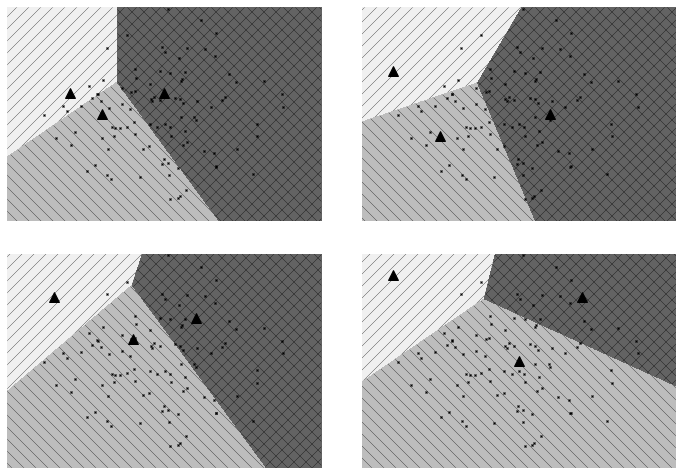

In [20]:
import matplotlib.gridspec as gridspec

fig2, axs = plt.subplots(2, 2, figsize=(10,7))
axs_iter = iter(axs.flatten().tolist())
fig2.tight_layout()
classification_samples = make_gaussian_quantiles(n_samples = 100, n_features = 2, n_classes = 2, random_state=42, mean = (50, 50), cov=400)[0]

for centroids in centroids_per_plot:
    ax = next(axs_iter)
    clf = KNeighborsClassifier(1)
    clf.fit(centroids, [1,2,3])
    

    x_min, x_max = 0, 100
    y_min, y_max = 0, 100
    
    ax.set_xlim((y_min, y_max))
    ax.set_ylim((x_min, x_max))
    ax.axis('off')
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, levels=[0,1,2,3], corner_mask=False, colors=MainColorMap.mpl_colors, alpha=1, hatches=hatches)

    ax.plot(centroids[:, 0], centroids[:, 1], marker='^', color = 'black', linewidth=0, markersize=10)

    ax.plot(classification_samples[:, 0], classification_samples[:, 1], marker='x', color = 'black', linewidth=0, markersize=2)


In [22]:
fig2.savefig('learning-process-visualization.pdf')